In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# **Preprocessing**

In [29]:
df = pd.read_csv('cleaned_laptop_dataset.csv')

In [30]:
df.shape

(3601, 16)

In [31]:
df.isnull().sum()

Brand               0
Price               0
Processor_Brand     0
RAM_Expandable      0
RAM_Size (GB)       0
RAM_TYPE            0
Processer_speed     0
Display_type        0
GPU_Brand           0
SSD(GB)             0
HDD(GB)             0
Processor_Series    0
Processor_Tier      0
Operating_System    0
Display_Category    0
GPU_Tier            0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             3601 non-null   object 
 1   Price             3601 non-null   float64
 2   Processor_Brand   3601 non-null   object 
 3   RAM_Expandable    3601 non-null   object 
 4   RAM_Size (GB)     3601 non-null   int64  
 5   RAM_TYPE          3601 non-null   object 
 6   Processer_speed   3601 non-null   float64
 7   Display_type      3601 non-null   object 
 8   GPU_Brand         3601 non-null   object 
 9   SSD(GB)           3601 non-null   int64  
 10  HDD(GB)           3601 non-null   int64  
 11  Processor_Series  3601 non-null   object 
 12  Processor_Tier    3601 non-null   object 
 13  Operating_System  3601 non-null   object 
 14  Display_Category  3601 non-null   object 
 15  GPU_Tier          3601 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

In [33]:
df['Processor_Brand'] = df['Processor_Brand'].astype('category')
df['Processor_Series'] = df['Processor_Series'].astype('category')
df['Processor_Tier'] = df['Processor_Tier'].astype('category')
df['GPU_Brand'] = df['GPU_Brand'].astype('category')
df['GPU_Tier'] = df['GPU_Tier'].astype('category')
df['RAM_TYPE'] = df['RAM_TYPE'].astype('category')
df['Display_type'] = df['Display_type'].astype('category')
df['Display_Category'] = df['Display_Category'].astype('category')
df['RAM_Expandable'] = df['RAM_Expandable'].astype('category')
df['Operating_System'] = df['Operating_System'].astype('category')

In [34]:
# df.drop(columns=['Processor_Series'],inplace=True)
df.drop(columns=['Operating_System'], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             3601 non-null   object  
 1   Price             3601 non-null   float64 
 2   Processor_Brand   3601 non-null   category
 3   RAM_Expandable    3601 non-null   category
 4   RAM_Size (GB)     3601 non-null   int64   
 5   RAM_TYPE          3601 non-null   category
 6   Processer_speed   3601 non-null   float64 
 7   Display_type      3601 non-null   category
 8   GPU_Brand         3601 non-null   category
 9   SSD(GB)           3601 non-null   int64   
 10  HDD(GB)           3601 non-null   int64   
 11  Processor_Series  3601 non-null   category
 12  Processor_Tier    3601 non-null   category
 13  Display_Category  3601 non-null   category
 14  GPU_Tier          3601 non-null   category
dtypes: category(9), float64(2), int64(3), object(1)
memory usage: 202.7+ KB


In [36]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns
print("Categorical columns:", list(categorical_cols))

# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))

Categorical columns: ['Processor_Brand', 'RAM_Expandable', 'RAM_TYPE', 'Display_type', 'GPU_Brand', 'Processor_Series', 'Processor_Tier', 'Display_Category', 'GPU_Tier']
Numerical columns: ['Price', 'RAM_Size (GB)', 'Processer_speed', 'SSD(GB)', 'HDD(GB)']


In [37]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"{df[col].value_counts()}\n")

Processor_Brand: 3 unique values
Processor_Brand
Intel    2717
AMD       866
Apple      18
Name: count, dtype: int64

RAM_Expandable: 2 unique values
RAM_Expandable
No     1923
Yes    1678
Name: count, dtype: int64

RAM_TYPE: 8 unique values
RAM_TYPE
DDR4       2633
DDR5        342
LPDDR5      235
LPDDR4X     134
DDR3        111
LPDDR5X      76
LPDDR3       47
LPDDR4       23
Name: count, dtype: int64

Display_type: 2 unique values
Display_type
LCD    1891
LED    1710
Name: count, dtype: int64

GPU_Brand: 4 unique values
GPU_Brand
Intel     1760
NVIDIA    1242
AMD        581
Apple       18
Name: count, dtype: int64

Processor_Series: 18 unique values
Processor_Series
Intel Core I5         1198
Intel Core I3          638
Intel Core I7          593
AMD Ryzen 5            353
AMD Ryzen 7            248
AMD Ryzen 3            113
Intel Celeron           73
Intel Core I9           67
AMD A-Series            59
Intel Pentium           55
Intel Core Ultra 7      49
AMD Ryzen 9             43


## **Encode Categorical Columns**

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Binary columns
df["RAM_Expandable"] = df["RAM_Expandable"].map({"Yes": 1, "No": 0})
df["Display_type"] = df["Display_type"].map({"LED": 1, "LCD": 0})

# Ordinal columns
processor_tier_order = {"Low-End": 1, "Mid-End": 2, "Upper Mid-End": 3, "High-End": 4, "Apple M-series": 5}
display_category_order = {"Small": 1, "Medium": 2, "Large": 3}
gpu_tier_order = {"Entry-level": 1, "Low-end": 2, "Mid-end": 3, "High-end": 4}
ram_type_order = {
    "DDR3": 1, "LPDDR3": 2, "DDR4": 3,"LPDDR4":4 ,"LPDDR4X": 5, "DDR5": 6,
    "LPDDR5": 7, "LPDDR5X": 8
}

df["Processor_Tier"] = df["Processor_Tier"].map(processor_tier_order)
df["Display_Category"] = df["Display_Category"].map(display_category_order)
df["GPU_Tier"] = df["GPU_Tier"].map(gpu_tier_order)
df["RAM_TYPE"] = df["RAM_TYPE"].map(ram_type_order)


# # Label Encoding for ordinal columns
# le_brand = LabelEncoder()
# le_proc_brand = LabelEncoder()
# le_gpu_brand = LabelEncoder()
# le_proc_series = LabelEncoder()
# le_ops = LabelEncoder()

# df["Brand"] = le_brand.fit_transform(df["Brand"])
# df["Processor_Brand"] = le_proc_brand.fit_transform(df["Processor_Brand"])
# df["GPU_Brand"] = le_gpu_brand.fit_transform(df["GPU_Brand"])
# df["Processor_Series"] = le_proc_series.fit_transform(df["Processor_Series"])
# # df["Operating_System"] = le_ops.fit_transform(df["Operating_System"])

# One-Hot Encoding for nominal columns

df = pd.get_dummies(df, 
                    columns=['Brand', 'Processor_Brand', 'GPU_Brand', 'Processor_Series'], 
                    drop_first=True)



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Price                                3601 non-null   float64 
 1   RAM_Expandable                       3601 non-null   category
 2   RAM_Size (GB)                        3601 non-null   int64   
 3   RAM_TYPE                             3601 non-null   category
 4   Processer_speed                      3601 non-null   float64 
 5   Display_type                         3601 non-null   category
 6   SSD(GB)                              3601 non-null   int64   
 7   HDD(GB)                              3601 non-null   int64   
 8   Processor_Tier                       3601 non-null   category
 9   Display_Category                     3601 non-null   category
 10  GPU_Tier                             3601 non-null   category
 11  Brand_Acer       

In [40]:
df.head()

,Price,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,SSD(GB),HDD(GB),Processor_Tier,Display_Category,...,Processor_Series_Intel Celeron,Processor_Series_Intel Core I3,Processor_Series_Intel Core I5,Processor_Series_Intel Core I7,Processor_Series_Intel Core I9,Processor_Series_Intel Core Ultra 5,Processor_Series_Intel Core Ultra 7,Processor_Series_Intel Core Ultra 9,Processor_Series_Intel Other,Processor_Series_Intel Pentium
0,127011.5,1,8,3,4.0,0,512,0,2,2,...,False,False,False,False,False,False,False,False,False,False
1,274750.0,1,16,6,3.3,0,512,0,2,2,...,False,False,True,False,False,False,False,False,False,False
2,194215.0,1,8,3,4.2,0,512,0,2,2,...,False,False,True,False,False,False,False,False,False,False
3,76965.0,0,8,5,1.7,0,512,0,1,2,...,False,True,False,False,False,False,False,False,False,False
4,173596.5,1,8,3,4.0,0,512,0,2,1,...,False,False,False,False,False,False,False,False,False,False


## **Heatmap**

In [41]:
#Separate features and target
feature_cols = [col for col in df.columns if col != 'Price'] 
X = df[feature_cols]  # 23 features
y = df['Price']       # 1 target

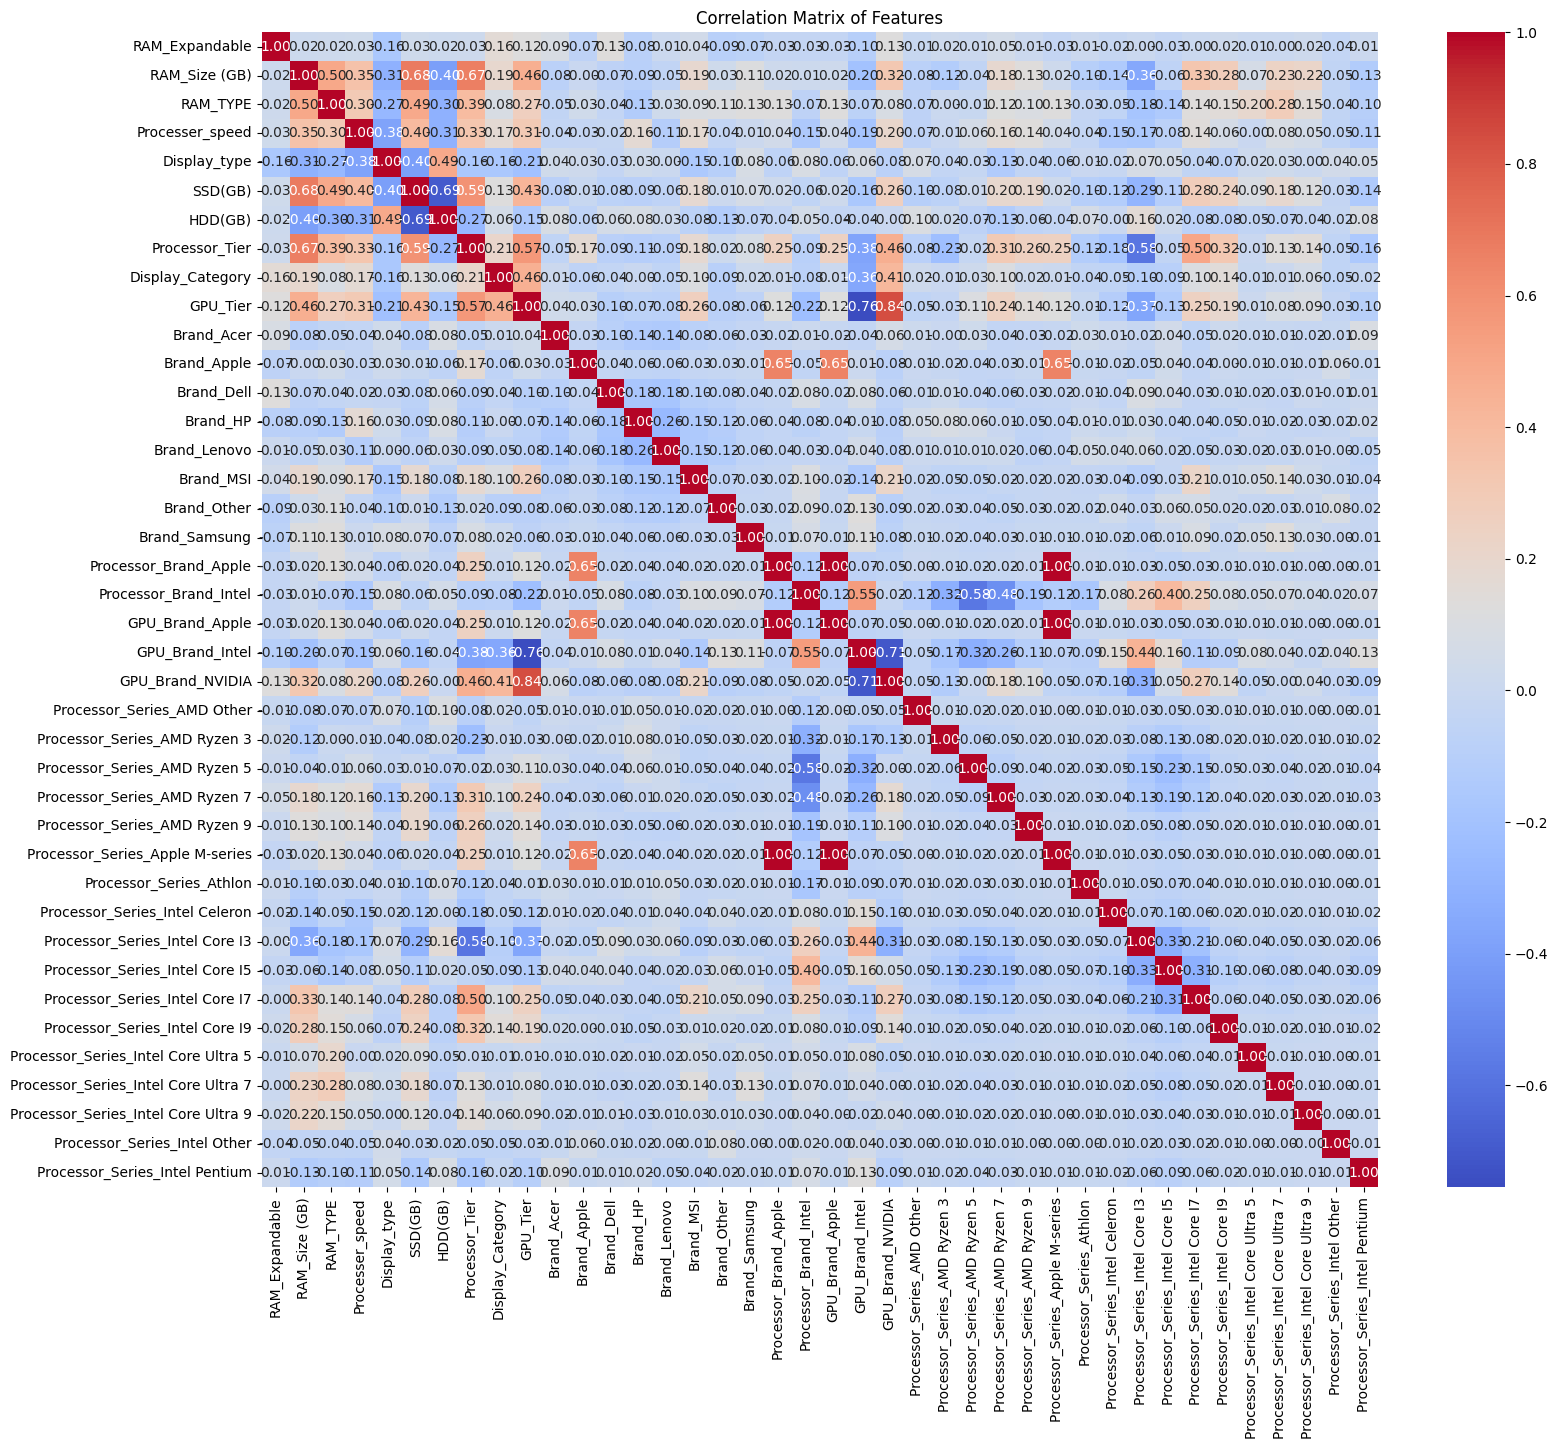

In [42]:
plt.figure(figsize=(18,15))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [43]:
import numpy as np

X_vif = X.copy()
# Remove rows with NaN or Inf values
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)  # replace infs with NaN
X_vif = X_vif.dropna()  # drop rows with NaN values


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np


# Keep only numeric columns
X_vif = X_vif.select_dtypes(include=['int64', 'float64', 'category'])

# Handle missing and infinite values
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)
X_vif = X_vif.dropna()

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


            Feature        VIF
7    Processor_Tier  16.037318
1     RAM_Size (GB)  11.676592
5           SSD(GB)  11.574734
8  Display_Category   9.994665
2          RAM_TYPE   8.843052
3   Processer_speed   8.048095
9          GPU_Tier   7.608586
6           HDD(GB)   3.163823
4      Display_type   2.410902
0    RAM_Expandable   1.932427


# Model Development

### **Split Features and Target**

In [45]:
X = df.drop('Price', axis=1)
y = df['Price']

### **Train-Test Split**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Random Forest Regressor

In [48]:
baseline_model = RandomForestRegressor(random_state=42)
# baseline_model.fit(X_train, y_train)
baseline_model.fit(X_train_scaled, y_train)

y_pred = baseline_model.predict(X_test_scaled)
# y_pred = baseline_model.predict(X_test)

print("----- Baseline Model -----")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



----- Baseline Model -----
R² Score: 0.7635368065407145
MAE: 45694.76352554963
RMSE: 75542.0549695252


In [49]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=param_grid,
#     scoring='r2',
#     cv=5,             # 5-fold cross-validation
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_train, y_train)
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV R² Score:", grid_search.best_score_)


from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=baseline_model,
    param_distributions=param_dist,
    n_iter=50,                 # number of random combinations to try
    cv=5,                      # 5-fold cross-validation
    scoring='r2',              # optimize R² score
    n_jobs=-1,                 # use all CPU cores
    verbose=2,
    random_state=42
)

#Fit on training data
random_search.fit(X_train_scaled, y_train)
# random_search.fit(X_train, y_train)

#Get the best model and parameters
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation R²:", random_search.best_score_)





Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Cross-Validation R²: 0.7739430138477909


In [50]:
# best_rf = grid_search.best_estimator_
# best_rf.fit(X_train, y_train)

# y_pred_best = best_rf.predict(X_test)

# print("\n----- Tuned Model -----")
# print("R² Score:", r2_score(y_test, y_pred_best))
# print("MAE:", mean_absolute_error(y_test, y_pred_best))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

best_rf = random_search.best_estimator_

# --- 6. Evaluate on test data ---
y_pred = best_rf.predict(X_test_scaled)
# y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n----- Tuned Random Forest Performance - Randomized search -----")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)



----- Tuned Random Forest Performance - Randomized search -----
R² Score: 0.7821219894787343
MAE: 43688.43749187909
RMSE: 72512.64051011296


In [51]:
# param_grid = {
#     'n_estimators': [400, 500, 600],
#     'max_depth': [20, 30, 40],
#     'min_samples_split': [2, 3, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt']
# }
# param_grid = {
#     'n_estimators': [200, 300, 400],
#     'max_depth': [30, 40, 50],
#     'min_samples_split': [2, 3, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['log2']
# }
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [30, 40, 50, None],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
# grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_train)
# best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test_scaled)
# y_pred_best = best_rf.predict(X_test)
print("\n----- Final Tuned Model-----")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}
Best CV R² Score: 0.7731470656189243

----- Final Tuned Model-----
R² Score: 0.7859414642005355
MAE: 43750.31250660206
RMSE: 71874.24484253174


In [52]:
average_price = df["Price"].mean()
print("Average Laptop Price:", average_price)

MAE = 43151.83  # your model's MAE value
relative_error = (MAE / average_price) * 100
print(f"Average Laptop Price: {average_price:.2f}")
print(f"Relative Error: {relative_error:.2f}%")


Average Laptop Price: 248236.5144404332
Average Laptop Price: 248236.51
Relative Error: 17.38%


On average, this random forest model's predictions are within ~17% of the true price

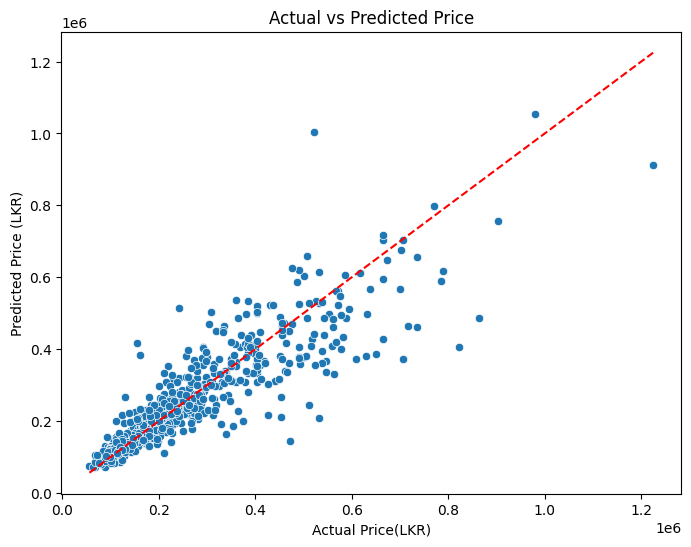

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price(LKR)")
plt.ylabel("Predicted Price (LKR)")
plt.title("Actual vs Predicted Price")
plt.show()

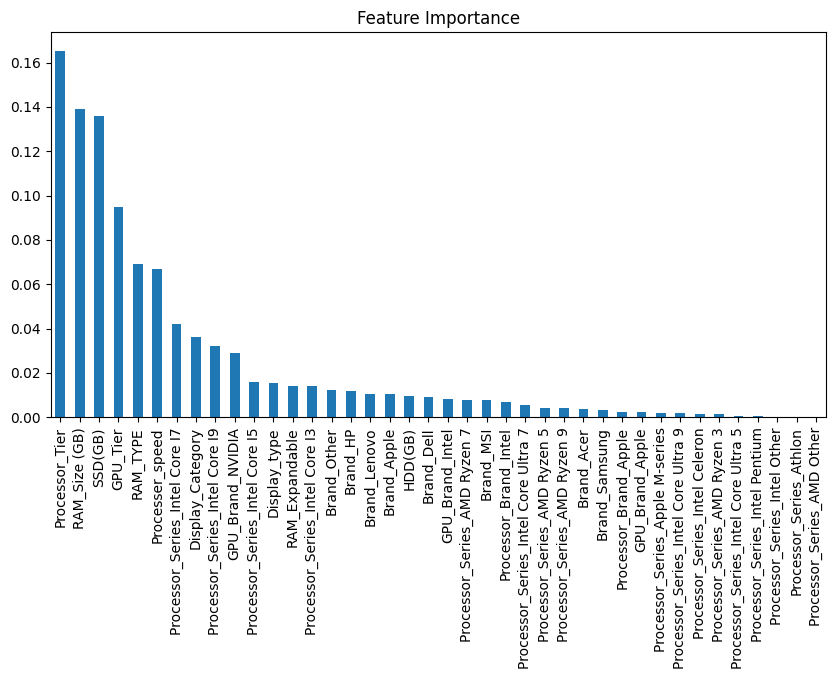

In [54]:
importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()


In [55]:
import joblib
joblib.dump(best_rf, "laptop_price_rf_model.pkl")
print("Model saved successfully!")


Model saved successfully!
